# Configuration

In [1]:
import mlflow
from datetime import datetime

from steps.data import main as data_main
from steps.train import main as train_main
from steps.validate import main as validate_main
from steps.deploy import main as deploy_main

EXPERIMENT_NAME = "tfm-ocr-chars"

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("tfm-ocr-chars")


def execution_name(prefix="pipeline"):
    now = datetime.now().strftime("%Y%m%d-%H%M%S")
    return f"{prefix}-{now}"

mlflow.set_experiment(EXPERIMENT_NAME)


/home/dborrego/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dborrego/.local/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


<Experiment: artifact_location='mlflow-artifacts:/789695712835189835', creation_time=1768401267123, experiment_id='789695712835189835', last_update_time=1768401267123, lifecycle_stage='active', name='tfm-ocr-chars', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [2]:
parent_run = mlflow.start_run(run_name=execution_name(), nested=False)
parent_run.info.run_id


'7fd70418f7774b2791d84fa51ff9e4e5'

# DATA

[DATOS] Subetapas completadas correctamente
🏃 View run datos at: http://localhost:5000/#/experiments/789695712835189835/runs/666d989c91ad49679785384d964fc145
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


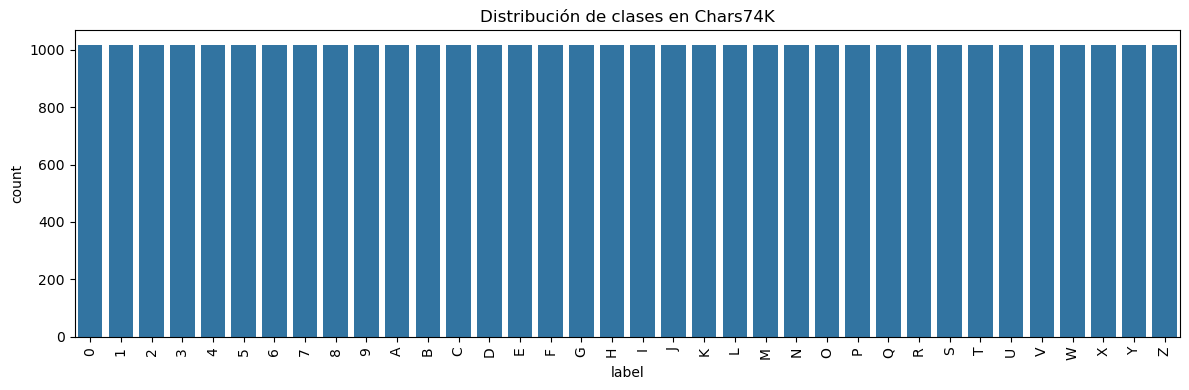

In [3]:
data_main()

# TRAIN

In [4]:
model = train_main(
    n_trials=1,
    epochs=2
)

[I 2026-01-16 10:25:03,618] A new study created in memory with name: ocr-hpo
/home/dborrego/proyectos/unir/tfm-plate/tfm-ocr/ocr-model/steps/train.py:274: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp)


[Epoch 0] tr_acc=0.848 val_acc=0.957 val_f1m=0.956 top3=0.986 lr=7.40e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9560 (val_acc=0.9565)
[Epoch 1] tr_acc=0.948 val_acc=0.965 val_f1m=0.965 top3=0.992 lr=7.40e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9646 (val_acc=0.9654)
🏃 View run train at: http://localhost:5000/#/experiments/789695712835189835/runs/b10825f699be494d9221bbec5e55a14a
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
🏃 View run trial-0 at: http://localhost:5000/#/experiments/789695712835189835/runs/095da6b1eac747f88c051b0d30ae0924
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


[I 2026-01-16 10:27:37,962] Trial 0 finished with value: 0.9645613406903895 and parameters: {'batch': 32, 'lr': 0.0007400045149629319, 'weight_decay': 1.2614785961559791e-05, 'grad_clip': 1.507490804794878, 'label_smoothing': 0.0480328253769256}. Best is trial 0 with value: 0.9645613406903895.


Best: 0.9645613406903895 {'batch': 32, 'lr': 0.0007400045149629319, 'weight_decay': 1.2614785961559791e-05, 'grad_clip': 1.507490804794878, 'label_smoothing': 0.0480328253769256}


/home/dborrego/proyectos/unir/tfm-plate/tfm-ocr/ocr-model/steps/train.py:274: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp)


[Epoch 0] tr_acc=0.836 val_acc=0.956 val_f1m=0.956 top3=0.986 lr=7.40e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9556 (val_acc=0.9564)
[Epoch 1] tr_acc=0.944 val_acc=0.954 val_f1m=0.953 top3=0.991 lr=7.40e-04
[Epoch 1] ❌ No improvement: val_f1_macro=0.9533 (best=0.9556 @ epoch 0) | no_improve=1/8
🏃 View run train at: http://localhost:5000/#/experiments/789695712835189835/runs/c6e0c2cf1be14249ab3687f596736116
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
🏃 View run best-model-train at: http://localhost:5000/#/experiments/789695712835189835/runs/65948e635b564ee6a593dd257a28f02a
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
🏃 View run hpo-optuna at: http://localhost:5000/#/experiments/789695712835189835/runs/b4885e1eb49246509c69fa03b2b6ebed
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


# Validate

[VALIDACIÓN] Accuracy = 0.9579
[VALIDACIÓN] Etapa completada correctamente.
🏃 View run validate at: http://localhost:5000/#/experiments/789695712835189835/runs/448273c6ef684be793c5f4832e2dc0ba
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


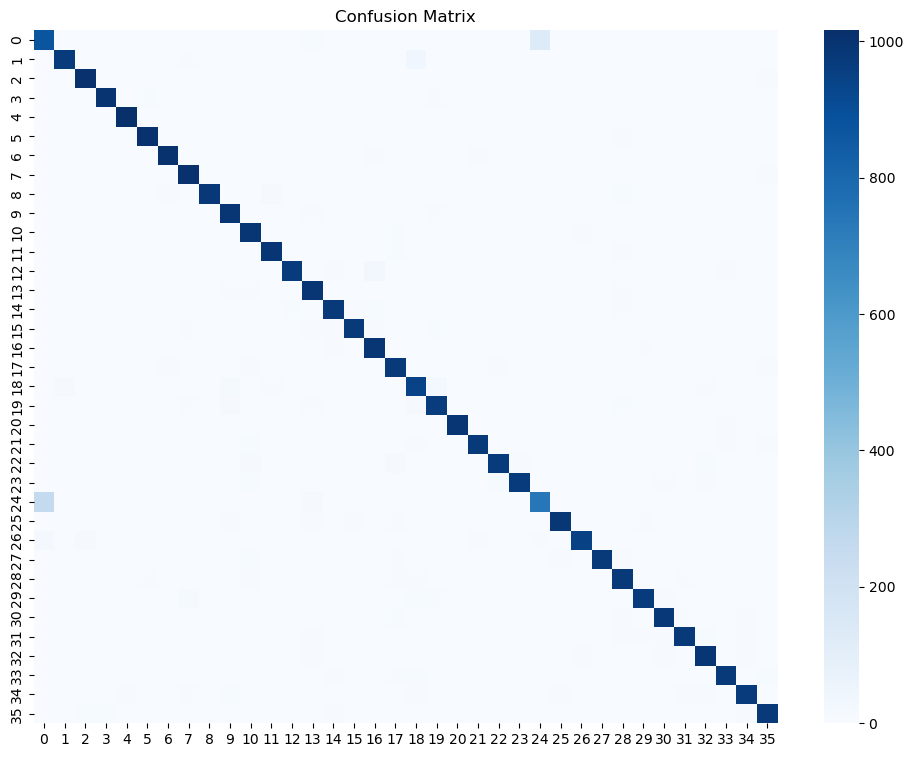

In [5]:
validate_main(model)     

# Deploy

In [6]:
deploy_main(model)

[DEPLOY] Preparando modelo REST PyFunc...


/home/dborrego/.local/lib/python3.13/site-packages/mlflow/pyfunc/__init__.py:3285: UserWarning: An input example was not provided when logging the model. To ensure the model signature functions correctly, specify the `input_example` parameter. See https://mlflow.org/docs/latest/model/signatures.html#model-input-example for more details about the benefits of using input_example.
  color_warning(
Successfully registered model 'ocr_model_rest'.
2026/01/16 10:30:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ocr_model_rest, version 1
Created version '1' of model 'ocr_model_rest'.


[DEPLOY] Modelo REST registrado correctamente.
[DEPLOY] Versión registrada: 1
🏃 View run deploy at: http://localhost:5000/#/experiments/789695712835189835/runs/079f5cc00aed453eaf3bbc2b1466d904
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


# END

In [7]:
mlflow.end_run()
print("Pipeline terminado.")

🏃 View run pipeline-20260116-102502 at: http://localhost:5000/#/experiments/789695712835189835/runs/7fd70418f7774b2791d84fa51ff9e4e5
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
Pipeline terminado.
